
# 🚗 Car Price Prediction

This project covers:
- Loading & understanding the dataset  
- Exploratory Data Analysis (EDA)  
- Feature engineering  
- Model training  
- Evaluation  




In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit

In [61]:
df = pd.read_csv('car_prediction_data.csv')

In [62]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [63]:
df.shape

(301, 9)

In [64]:
print(df["Seller_Type"].unique())
print(df["Fuel_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner"].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [65]:
df.isnull().sum()  ## from the output we get to know that our dataset doesnt contain any null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [66]:
df.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

#### Drop the Car_Name column (as it won't be of much use for the project)

In [67]:
final_dataset = df[["Year","Selling_Price","Present_Price","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner"]]

In [68]:
final_dataset.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  
0       Manual      0  
1       Manual      0  
2       Manual      0  
3       Manual      0  
4       Manual      0

In [69]:
final_dataset["Current_Year"] = 2025

In [70]:
final_dataset.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Current_Year  
0       Manual      0          2025  
1       Manual      0          2025  
2       Manual      0          2025  
3       Manual      0          2025  
4       Manual      0          2025

In [71]:
final_dataset["no.of_years"] = final_dataset["Current_Year"] - final_dataset["Year"]

In [72]:
final_dataset.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Current_Year  no.of_years  
0       Manual      0          2025           11  
1       Manual      0          2025           12  
2       Manual      0          2025            8  
3       Manual      0          2025           14  
4       Manual      0          2025           11

In [73]:
final_dataset.drop(["Year"],axis=1,inplace=True)

In [74]:
final_dataset.head()

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Current_Year  no.of_years  
0       Manual      0          2025           11  
1       Manual      0          2025           12  
2       Manual      0          2025            8  
3       Manual      0          2025           14  
4       Manual      0          2025           11

### One-Hot Encoding

One-hot encoding is a process used to convert categorical variables into a numerical format that can be used by machine learning algorithms.

In [133]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [134]:
final_dataset.head()

Selling_Price  Present_Price  Kms_Driven  Owner  no.of_years  \
0           3.35           5.59       27000      0           11   
1           4.75           9.54       43000      0           12   
2           7.25           9.85        6900      0            8   
3           2.85           4.15        5200      0           14   
4           4.60           6.87       42450      0           11   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0             False              True                   False   
1              True             False                   False   
2             False              True                   False   
3             False              True                   False   
4              True             False                   False   

   Transmission_Manual  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True

In [135]:
final_dataset= final_dataset.drop(["Current_Year"],axis=1)

KeyError: "['Current_Year'] not found in axis"

In [ ]:
final_dataset.head()

Selling_Price  Present_Price  Kms_Driven  Owner  no.of_years  \
0           3.35           5.59       27000      0           11   
1           4.75           9.54       43000      0           12   
2           7.25           9.85        6900      0            8   
3           2.85           4.15        5200      0           14   
4           4.60           6.87       42450      0           11   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0             False              True                   False   
1              True             False                   False   
2             False              True                   False   
3             False              True                   False   
4              True             False                   False   

   Transmission_Manual  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True

In [ ]:
final_dataset.corr() # gives the correlation between different features

Selling_Price  Present_Price  Kms_Driven     Owner  \
Selling_Price                1.000000       0.878983    0.029187 -0.088344   
Present_Price                0.878983       1.000000    0.203647  0.008057   
Kms_Driven                   0.029187       0.203647    1.000000  0.089216   
Owner                       -0.088344       0.008057    0.089216  1.000000   
no.of_years                 -0.236141       0.047584    0.524342  0.182104   
Fuel_Type_Diesel             0.552339       0.473306    0.172515 -0.053469   
Fuel_Type_Petrol            -0.540571      -0.465244   -0.172874  0.055687   
Seller_Type_Individual      -0.550724      -0.512030   -0.101419  0.124269   
Transmission_Manual         -0.367128      -0.348715   -0.162510 -0.050316   

                        no.of_years  Fuel_Type_Diesel  Fuel_Type_Petrol  \
Selling_Price             -0.236141          0.552339         -0.540571   
Present_Price              0.047584          0.473306         -0.465244   
Kms_Driven                 0.524342          0.172515         -0.172874   
Owner                      0.182104         -0.053469          0.055687   
no.of_years                1.000000         -0.064315          0.059959   
Fuel_Type_Diesel          -0.064315          1.000000         -0.979648   
Fuel_Type_Petrol           0.059959         -0.979648          1.000000   
Seller_Type_Individual     0.039896         -0.350467          0.358321   
Transmission_Manual       -0.000394         -0.098643          0.091013   

                        Seller_Type_Individual  Transmission_Manual  
Selling_Price                        -0.550724            -0.367128  
Present_Price                        -0.512030            -0.348715  
Kms_Driven                           -0.101419            -0.162510  
Owner                                 0.124269            -0.050316  
no.of_years                           0.039896            -0.000394  
Fuel_Type_Diesel                     -0.350467            -0.098643  
Fuel_Type_Petrol                      0.358321             0.091013  
Seller_Type_Individual                1.000000             0.063240  
Transmission_Manual                   0.063240             1.000000

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(final_dataset)

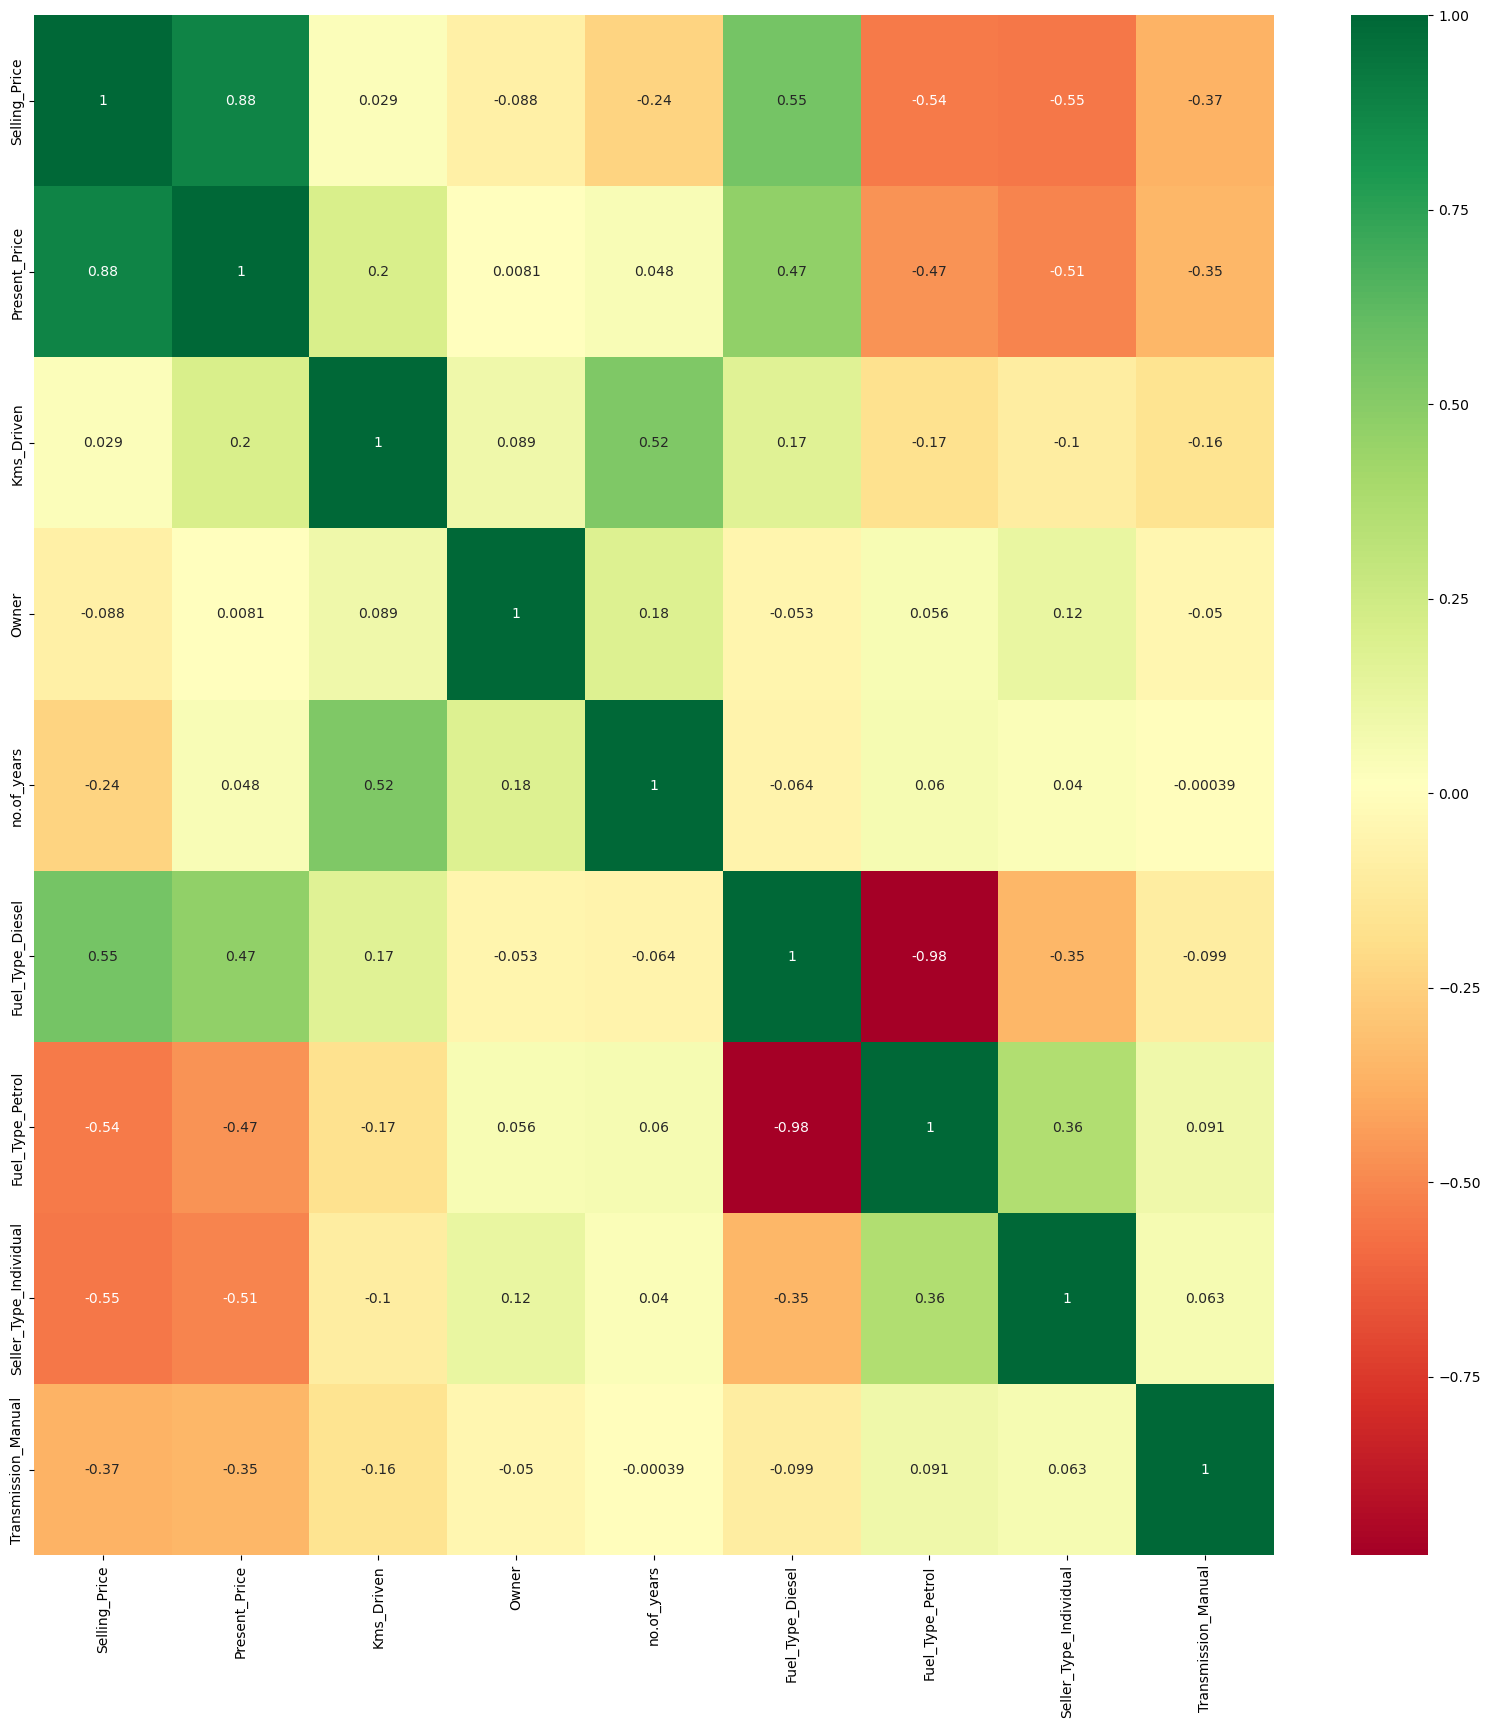

In [ ]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
pit.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")
pit.show()

Now we are going to seperate the x (features) and y (target)

In [ ]:
x = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [ ]:
x['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [ ]:
x.head()

Present_Price  Kms_Driven  Owner  no.of_years  Fuel_Type_Diesel  \
0           5.59       27000      0           11             False   
1           9.54       43000      0           12              True   
2           9.85        6900      0            8             False   
3           4.15        5200      0           14             False   
4           6.87       42450      0           11              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True

In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


**Feature Importance**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model =  ExtraTreesRegressor( )
model.fit(x,y)


ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[0.35673134 0.04145456 0.00085162 0.07440693 0.23718575 0.00877571
 0.133092   0.1475021 ]


In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
pit.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)


**Using RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV for hyperparameter tuning which helps in selecting the best feature
#n_estimators means no.of trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop =1200, num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [ ]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf=RandomForestRegressor()

In [ ]:
#Use the random grid to search for best hyperparameters
rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=4)

In [ ]:
rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estima

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.0s
[CV] END max_depth=30, m

c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=4, scoring='neg_mean_squared_error', verbose=2)

In [ ]:
rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 5}

In [ ]:
rf.best_score_

-6.709456691789775

In [ ]:
predictions = rf.predict(x_test)

<Axes: xlabel='Selling_Price', ylabel='Count'>

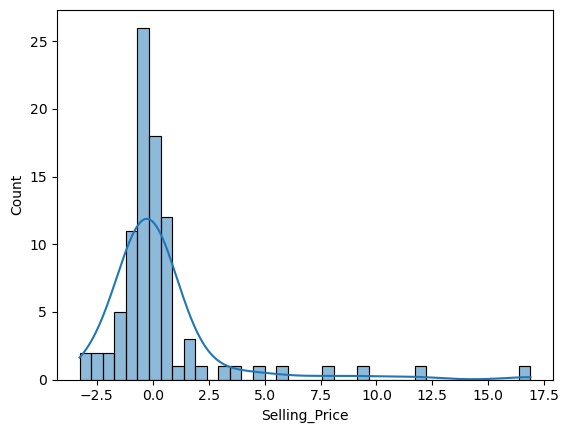

In [ ]:
sns.histplot(y_test - predictions, kde=True)

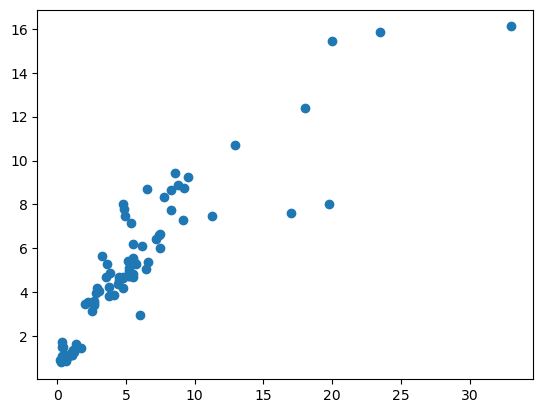

In [ ]:
pit.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 1.3733709523298328
MSE: 8.027479850304355
RMSE: 2.833280757409042


**Using XGBoost Regressor**

In [ ]:
import xgboost as xgb
from scipy.stats import uniform, randint

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:linear",random_state=12)

In [ ]:
params = {
    "gamma":uniform(0,0.5),
    "learning_rate":uniform(0.03,0.3),
    "max_depth":randint(2,6),
    "n_estimators":randint(100,150),
    "subsample":uniform(0.6,0.4)
        }

In [ ]:
xgb = RandomizedSearchCV(estimator=xgb_model,param_distributions=params,scoring = 'neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=12,n_jobs=1)

In [ ]:
xgb.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.07708142118983619, learning_rate=0.2520149089546214, max_depth=3, n_estimators=102, subsample=0.8134957573521191; total time=   0.0s
[CV] END gamma=0.07708142118983619, learning_rate=0.2520149089546214, max_depth=3, n_estimators=102, subsample=0.8134957573521191; total time=   0.0s
[CV] END gamma=0.07708142118983619, learning_rate=0.2520149089546214, max_depth=3, n_estimators=102, subsample=0.8134957573521191; total time=   0.0s
[CV] END gamma=0.07708142118983619, learning_rate=0.2520149089546214, max_depth=3, n_estimators=102, subsample=0.8134957573521191; total time=   0.0s
[CV] END gamma=0.07708142118983619, learning_rate=0.2520149089546214, max_depth=3, n_estimators=102, subsample=0.8134957573521191; total time=   0.0s


c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-r

[CV] END gamma=0.007287481242709837, learning_rate=0.3056241024299655, max_depth=2, n_estimators=105, subsample=0.6133685710505378; total time=   0.0s
[CV] END gamma=0.007287481242709837, learning_rate=0.3056241024299655, max_depth=2, n_estimators=105, subsample=0.6133685710505378; total time=   0.0s


c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-r

[CV] END gamma=0.007287481242709837, learning_rate=0.3056241024299655, max_depth=2, n_estimators=105, subsample=0.6133685710505378; total time=   0.0s
[CV] END gamma=0.007287481242709837, learning_rate=0.3056241024299655, max_depth=2, n_estimators=105, subsample=0.6133685710505378; total time=   0.0s
[CV] END gamma=0.007287481242709837, learning_rate=0.3056241024299655, max_depth=2, n_estimators=105, subsample=0.6133685710505378; total time=   0.0s
[CV] END gamma=0.4784746681375584, learning_rate=0.07116279640682294, max_depth=2, n_estimators=140, subsample=0.9934588639266048; total time=   0.0s
[CV] END gamma=0.4784746681375584, learning_rate=0.07116279640682294, max_depth=2, n_estimators=140, subsample=0.9934588639266048; total time=   0.0s
[CV] END gamma=0.4784746681375584, learning_rate=0.07116279640682294, max_depth=2, n_estimators=140, subsample=0.9934588639266048; total time=   0.0s
[CV] END gamma=0.4784746681375584, learning_rate=0.07116279640682294, max_depth=2, n_estimators=1

c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-r

[CV] END gamma=0.2407651053843481, learning_rate=0.303761650179906, max_depth=2, n_estimators=135, subsample=0.6591895507336784; total time=   0.0s
[CV] END gamma=0.2407651053843481, learning_rate=0.303761650179906, max_depth=2, n_estimators=135, subsample=0.6591895507336784; total time=   0.0s
[CV] END gamma=0.2407651053843481, learning_rate=0.303761650179906, max_depth=2, n_estimators=135, subsample=0.6591895507336784; total time=   0.0s
[CV] END gamma=0.2407651053843481, learning_rate=0.303761650179906, max_depth=2, n_estimators=135, subsample=0.6591895507336784; total time=   0.0s
[CV] END gamma=0.2407651053843481, learning_rate=0.303761650179906, max_depth=2, n_estimators=135, subsample=0.6591895507336784; total time=   0.0s


c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-r

[CV] END gamma=0.4536336790225558, learning_rate=0.23529752023846093, max_depth=4, n_estimators=116, subsample=0.9058241801355515; total time=   0.0s
[CV] END gamma=0.4536336790225558, learning_rate=0.23529752023846093, max_depth=4, n_estimators=116, subsample=0.9058241801355515; total time=   0.0s
[CV] END gamma=0.4536336790225558, learning_rate=0.23529752023846093, max_depth=4, n_estimators=116, subsample=0.9058241801355515; total time=   0.0s
[CV] END gamma=0.4536336790225558, learning_rate=0.23529752023846093, max_depth=4, n_estimators=116, subsample=0.9058241801355515; total time=   0.0s
[CV] END gamma=0.4536336790225558, learning_rate=0.23529752023846093, max_depth=4, n_estimators=116, subsample=0.9058241801355515; total time=   0.0s
[CV] END gamma=0.010404898976033083, learning_rate=0.07056305351073505, max_depth=4, n_estimators=148, subsample=0.7239590337960117; total time=   0.0s


c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-r

[CV] END gamma=0.010404898976033083, learning_rate=0.07056305351073505, max_depth=4, n_estimators=148, subsample=0.7239590337960117; total time=   0.0s
[CV] END gamma=0.010404898976033083, learning_rate=0.07056305351073505, max_depth=4, n_estimators=148, subsample=0.7239590337960117; total time=   0.0s
[CV] END gamma=0.010404898976033083, learning_rate=0.07056305351073505, max_depth=4, n_estimators=148, subsample=0.7239590337960117; total time=   0.0s


c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-r

[CV] END gamma=0.010404898976033083, learning_rate=0.07056305351073505, max_depth=4, n_estimators=148, subsample=0.7239590337960117; total time=   0.0s
[CV] END gamma=0.3357263226060013, learning_rate=0.17136893347500423, max_depth=2, n_estimators=115, subsample=0.7158347134122214; total time=   0.0s
[CV] END gamma=0.3357263226060013, learning_rate=0.17136893347500423, max_depth=2, n_estimators=115, subsample=0.7158347134122214; total time=   0.0s
[CV] END gamma=0.3357263226060013, learning_rate=0.17136893347500423, max_depth=2, n_estimators=115, subsample=0.7158347134122214; total time=   0.0s
[CV] END gamma=0.3357263226060013, learning_rate=0.17136893347500423, max_depth=2, n_estimators=115, subsample=0.7158347134122214; total time=   0.0s
[CV] END gamma=0.3357263226060013, learning_rate=0.17136893347500423, max_depth=2, n_estimators=115, subsample=0.7158347134122214; total time=   0.0s


c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-r

[CV] END gamma=0.3665629888063353, learning_rate=0.2407867065765739, max_depth=2, n_estimators=101, subsample=0.7338590116424223; total time=   0.0s
[CV] END gamma=0.3665629888063353, learning_rate=0.2407867065765739, max_depth=2, n_estimators=101, subsample=0.7338590116424223; total time=   0.0s
[CV] END gamma=0.3665629888063353, learning_rate=0.2407867065765739, max_depth=2, n_estimators=101, subsample=0.7338590116424223; total time=   0.0s
[CV] END gamma=0.3665629888063353, learning_rate=0.2407867065765739, max_depth=2, n_estimators=101, subsample=0.7338590116424223; total time=   0.0s
[CV] END gamma=0.3665629888063353, learning_rate=0.2407867065765739, max_depth=2, n_estimators=101, subsample=0.7338590116424223; total time=   0.0s
[CV] END gamma=0.48902903950825943, learning_rate=0.2173746335206057, max_depth=2, n_estimators=111, subsample=0.6486415202170885; total time=   0.0s
[CV] END gamma=0.48902903950825943, learning_rate=0.2173746335206057, max_depth=2, n_estimators=111, subs

c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-r

[CV] END gamma=0.48902903950825943, learning_rate=0.2173746335206057, max_depth=2, n_estimators=111, subsample=0.6486415202170885; total time=   0.0s
[CV] END gamma=0.48902903950825943, learning_rate=0.2173746335206057, max_depth=2, n_estimators=111, subsample=0.6486415202170885; total time=   0.0s
[CV] END gamma=0.48902903950825943, learning_rate=0.2173746335206057, max_depth=2, n_estimators=111, subsample=0.6486415202170885; total time=   0.0s
[CV] END gamma=0.272731801147164, learning_rate=0.15651733037376792, max_depth=4, n_estimators=106, subsample=0.915770590290839; total time=   0.0s
[CV] END gamma=0.272731801147164, learning_rate=0.15651733037376792, max_depth=4, n_estimators=106, subsample=0.915770590290839; total time=   0.0s
[CV] END gamma=0.272731801147164, learning_rate=0.15651733037376792, max_depth=4, n_estimators=106, subsample=0.915770590290839; total time=   0.0s


c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:42] WARNING: C:\actions-r

[CV] END gamma=0.272731801147164, learning_rate=0.15651733037376792, max_depth=4, n_estimators=106, subsample=0.915770590290839; total time=   0.0s
[CV] END gamma=0.272731801147164, learning_rate=0.15651733037376792, max_depth=4, n_estimators=106, subsample=0.915770590290839; total time=   0.0s


c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Medha Ramanathan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:58:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016BD9D57860>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016BD762A990>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016BD9D57B00>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016BD9CF5BB0>},
                   random_state=12, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
xgb.best_score_

-2.077355298941454

In [ ]:
xgb.best_params_

{'gamma': 0.272731801147164,
 'learning_rate': 0.15651733037376792,
 'max_depth': 4,
 'n_estimators': 106,
 'subsample': 0.915770590290839}

In [ ]:
predictions = xgb.predict(x_test)

<Axes: xlabel='Selling_Price', ylabel='Count'>

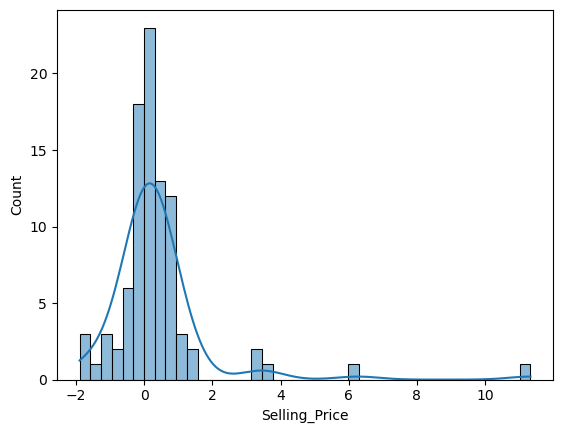

In [ ]:
sns.histplot(y_test - predictions, kde=True)

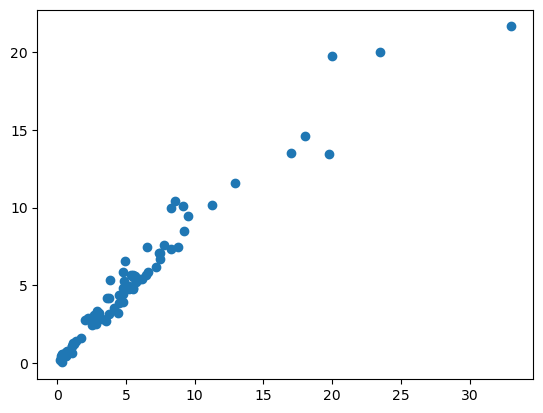

In [ ]:
pit.scatter(y_test,predictions)

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 0.7378029173743593
MSE: 2.6118225380245774
RMSE: 1.6161134050630783


**Using CatBoost Regressor**

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cb = CatBoostRegressor( )

In [ ]:
grid = {'learning_rate':[0.03,0.3],
        'depth':[4,6,10],
        'l2_leaf_reg':[1,3,5,7]}

In [ ]:
cb=RandomizedSearchCV(estimator=cb,param_distributions=grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=12,n_jobs=1)

In [ ]:
cb.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 5.0353962	total: 136ms	remaining: 2m 15s
1:	learn: 4.9639725	total: 143ms	remaining: 1m 11s
2:	learn: 4.8783750	total: 146ms	remaining: 48.7s
3:	learn: 4.7952055	total: 147ms	remaining: 36.6s
4:	learn: 4.7319947	total: 153ms	remaining: 30.4s
5:	learn: 4.6634420	total: 154ms	remaining: 25.5s
6:	learn: 4.5936097	total: 155ms	remaining: 21.9s
7:	learn: 4.5284006	total: 160ms	remaining: 19.9s
8:	learn: 4.4767743	total: 167ms	remaining: 18.3s
9:	learn: 4.4087648	total: 173ms	remaining: 17.1s
10:	learn: 4.3391185	total: 179ms	remaining: 16.1s
11:	learn: 4.2829611	total: 181ms	remaining: 14.9s
12:	learn: 4.2111908	total: 187ms	remaining: 14.2s
13:	learn: 4.1453916	total: 191ms	remaining: 13.4s
14:	learn: 4.0936189	total: 197ms	remaining: 12.9s
15:	learn: 4.0407264	total: 198ms	remaining: 12.2s
16:	learn: 3.9824500	total: 199ms	remaining: 11.5s
17:	learn: 3.9269792	total: 202ms	remaining: 11s
18:	learn: 3.8697928	total: 208

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000016BD8D11EB0>,
                   n_jobs=1,
                   param_distributions={'depth': [4, 6, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7],
                                        'learning_rate': [0.03, 0.3]},
                   random_state=12, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
cb.best_score_

-3.5520181748829116

In [ ]:
cb.best_params_

{'learning_rate': 0.03, 'l2_leaf_reg': 1, 'depth': 4}

In [ ]:
predictions = cb.predict(x_test)

<Axes: xlabel='Selling_Price', ylabel='Count'>

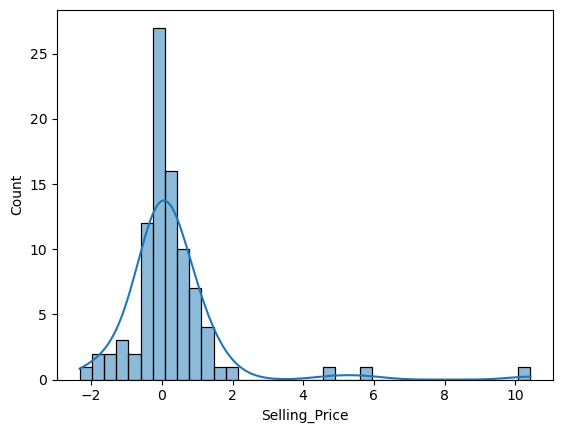

In [ ]:
sns.histplot(y_test - predictions, kde=True)

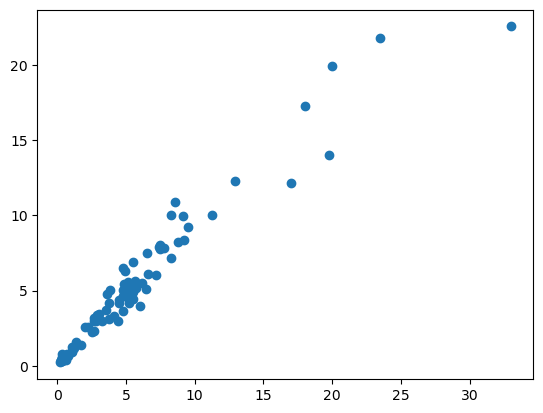

In [ ]:
pit.scatter(y_test,predictions)

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 0.739456907839512
MSE: 2.3473640985650035
RMSE: 1.5321109942053819


**Using LGBM Regressor**

In [137]:
from lightgbm import LGBMRegressor

In [138]:
lb = LGBMRegressor( )

In [139]:
lb.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 210, number of used features: 7
[LightGBM] [Info] Start training from score 4.459143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMRegressor()

In [140]:
params = {
    "gamma":uniform(0,0.5),
    "learning_rate":uniform(0.03,0.3),
    "max_depth":randint(2,6),
    "n_estimators":randint(100,150),
    "subsample":uniform(0.6,0.4)
}

In [141]:
lb = RandomizedSearchCV(estimator= lb,param_distributions=params,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=12,n_jobs=1)

In [142]:
lb.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 168, number of used features: 7
[LightGBM] [Info] Start training from score 4.545774
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016BE38205C0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016BE4986BD0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016BE4987080>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016BE44A37A0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016BE4986C00>},
                   random_state=12, scoring='neg_mean_squared_error',
                   verbose=2)

In [143]:
lb.best_params_

{'gamma': 0.3357263226060013,
 'learning_rate': 0.17136893347500423,
 'max_depth': 2,
 'n_estimators': 115,
 'subsample': 0.7158347134122214}

In [144]:
lb.best_score_

-5.735888868942191

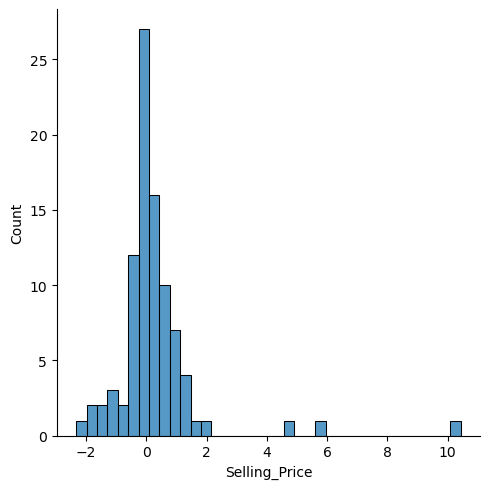

In [145]:
sns.displot(y_test-predictions)

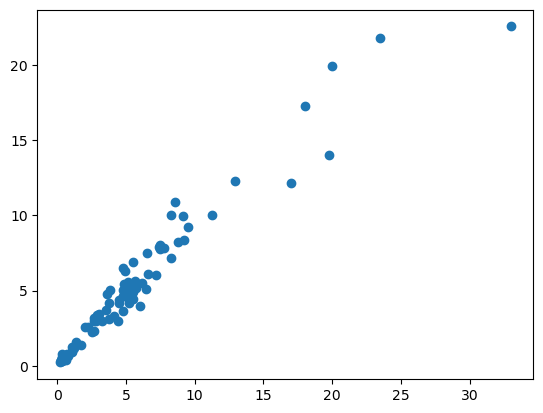

In [146]:
pit.scatter(y_test,predictions)

In [147]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 0.739456907839512
MSE: 2.3473640985650035
RMSE: 1.5321109942053819


**To find the best Model**

In [148]:
model_performance = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'XGBoost Regressor', 'CatBoost Regressor', 'LGBM Regressor'],
    'MAE': [1.3849633824714378, 0.7499104180506296, 0.739456907839512, 0.739456907839512],
    'MSE': [7.970757566899419, 2.683208354254523, 2.3473640985650035, 2.3473640985650035],
    'RMSE': [2.823253011492137, 1.638050168418087, 1.5321109942053819, 1.5321109942053819]
})

# Sort by RMSE to find the best model
model_performance = model_performance.sort_values(by='RMSE').reset_index(drop=True)

print("\nModel Performance Comparison (Sorted by RMSE):")
display(model_performance)


Model Performance Comparison (Sorted by RMSE):


Model       MAE       MSE      RMSE
0     CatBoost Regressor  0.739457  2.347364  1.532111
1         LGBM Regressor  0.739457  2.347364  1.532111
2      XGBoost Regressor  0.749910  2.683208  1.638050
3  RandomForestRegressor  1.384963  7.970758  2.823253

### Conclusion

Based on the Root Mean Squared Error (RMSE), the **CatBoost Regressor** and **LGBM Regressor** performed the best, exhibiting the lowest RMSE, MAE, and MSE values on the test set. This indicates that these models generalize better to unseen data compared to RandomForestRegressor and XGBoost Regressor for this particular dataset and problem.


### Predict Selling Price for a Custom Car Input

Enter the details for a car below to get a predicted selling price.

In [149]:
import pandas as pd

print("Please enter the details for the car:")

present_price = float(input("Present Price (in Lakhs, e.g., 7.0): "))
kms_driven = int(input("Kilometers Driven (e.g., 30000): "))
owner = int(input("Number of Previous Owners (0, 1, or 3): "))
no_of_years = int(input("Number of Years Since Purchase (e.g., 5): "))

fuel_type_str = input("Fuel Type (Petrol, Diesel, or CNG): ").lower()
fuel_type_diesel = (fuel_type_str == 'diesel')
fuel_type_petrol = (fuel_type_str == 'petrol')

seller_type_str = input("Seller Type (Dealer or Individual): ").lower()
seller_type_individual = (seller_type_str == 'individual')

transmission_str = input("Transmission Type (Manual or Automatic): ").lower()
transmission_manual = (transmission_str == 'manual')

# Create a DataFrame from the user inputs
user_input_data = {
    'Present_Price': [present_price],
    'Kms_Driven': [kms_driven],
    'Owner': [owner],
    'no.of_years': [no_of_years],
    'Fuel_Type_Diesel': [fuel_type_diesel],
    'Fuel_Type_Petrol': [fuel_type_petrol],
    'Seller_Type_Individual': [seller_type_individual],
    'Transmission_Manual': [transmission_manual]
}

user_df = pd.DataFrame(user_input_data)

user_df = user_df[x_train.columns]

print("\nYour Input Car Details:")
display(user_df)

# Make a prediction using the trained CatBoost model (cb)
predicted_price_user = cb.predict(user_df)

print(f"\nPredicted Selling Price: {predicted_price_user[0]:.2f} Lakhs")

Please enter the details for the car:

Your Input Car Details:


Present_Price  Kms_Driven  Owner  no.of_years  Fuel_Type_Diesel  \
0            7.0       30000      1            5              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0             False                    True                 True


Predicted Selling Price: 4.98 Lakhs
